In [1]:
import convml_tt
from convml_tt.system import TripletTrainerModel, TripletTrainerDataModule
from convml_tt.data.examples import fetch_example_dataset, ExampleData, fetch_pretrained_model, PretrainedModel
from convml_tt.data.dataset import TileType, ImageSingletDataset
from convml_tt.utils import get_embeddings
import convml_tt.interpretation

import numpy as np
import xarray as xr

import pytorch_lightning as pl

convml_tt.__version__

'v0.7.0+34.g589825d.dirty'

In [2]:
#dataset_path = "c:/Users/Ray/Documents/convml_tt/tmp"
dataset_path = "c:/Users/Ray/Documents/NC/EURE4CA"
tile_dataset = ImageSingletDataset(data_dir=dataset_path, tile_type=TileType.ANCHOR)

In [3]:
model_path = fetch_pretrained_model(pretrained_model=PretrainedModel.FIXED_NORM_STAGE2, data_dir="../../")
model = TripletTrainerModel.load_from_checkpoint(checkpoint_path="c:/Users/Ray/Downloads/checkpt")

Using downloaded and verified file: ../../fixednorm-stage-2.tgz
Extracting ../../fixednorm-stage-2.tgz to ../../


In [4]:
da_embeddings = get_embeddings(tile_dataset=tile_dataset, model=model)


100%|██████████| 138/138 [03:33<00:00,  1.55s/it]


In [5]:
da_embeddings.to_netcdf("embeddings_example.nc")

<AxesSubplot:>

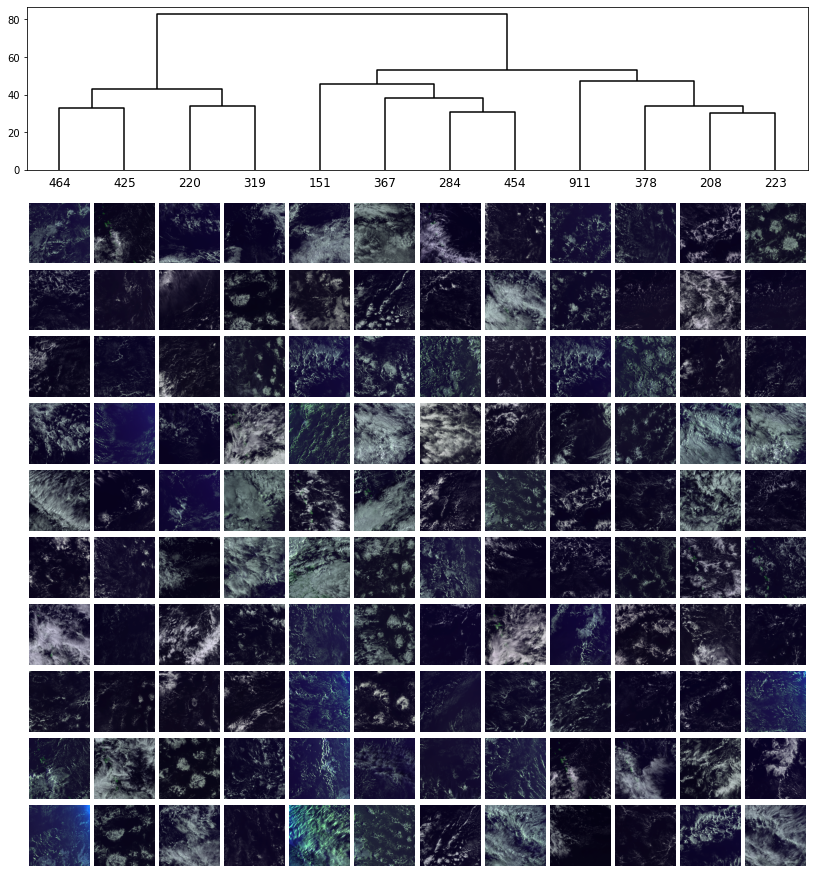

In [6]:
convml_tt.interpretation.plots.dendrogram(da_embeddings, n_samples=10, n_clusters_max=12)

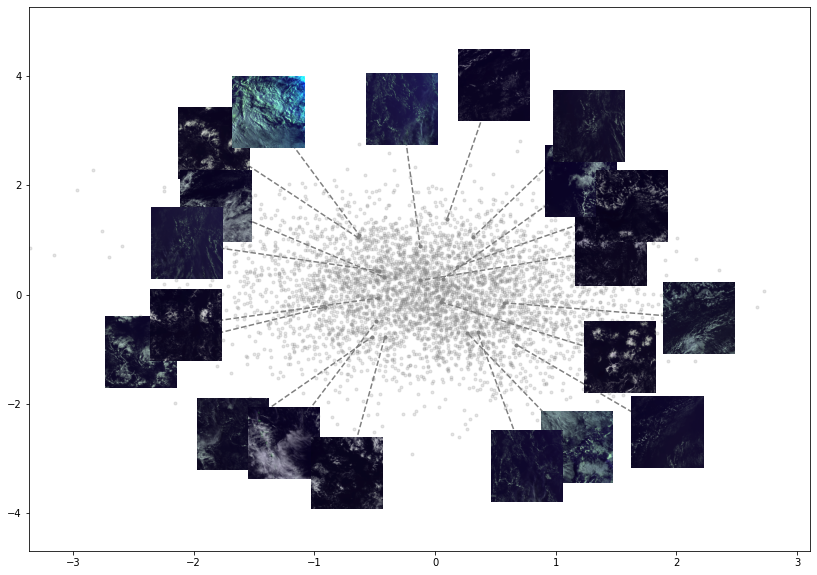

In [7]:
import numpy as np
import matplotlib.pyplot as plt
x = da_embeddings.sel(emb_dim=0)
y = da_embeddings.sel(emb_dim=1)
#fig, ax = plt.subplots(figsize=(8,6))
ax = None
_ = convml_tt.interpretation.plots.annotated_scatter_plot(x=x, y=y, points=20, ax=ax)

In [8]:
x = da_embeddings.sel(emb_dim=0)
y = da_embeddings.sel(emb_dim=1)

points = (np.array([-0.01, 0., 0.01]), np.array([-0.01, 0., 0.01]))

convml_tt.interpretation.plots.annotated_scatter_plot(x=x, y=y, points=points)

QhullError: QH6154 Qhull precision error: Initial simplex is flat (facet 1 is coplanar with the interior point)

While executing:  | qhull i Qt
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 2003292177  incidence  Qtriangulate  _pre-merge  _zero-centrum
  _max-width 0.75  Error-roundoff 6.4e-16  _one-merge 3.2e-15
  _near-inside 1.6e-14  Visible-distance 1.3e-15  U-max-coplanar 1.3e-15
  Width-outside 2.6e-15  _wide-facet 7.7e-15  _maxoutside 3.9e-15

The input to qhull appears to be less than 2 dimensional, or a
computation has overflowed.

Qhull could not construct a clearly convex simplex from points:
- p2(v3):  0.75  0.75
- p1(v2):  0.75  0.75
- p0(v1):     0     0

The center point is coplanar with a facet, or a vertex is coplanar
with a neighboring facet.  The maximum round off error for
computing distances is 6.4e-16.  The center point, facets and distances
to the center point are as follows:

center point      0.5      0.5

facet p1 p0 distance=    0
facet p2 p0 distance=    0
facet p2 p1 distance= -0.35

These points either have a maximum or minimum x-coordinate, or
they maximize the determinant for k coordinates.  Trial points
are first selected from points that maximize a coordinate.

The min and max coordinates for each dimension are:
  0:         0      0.75  difference= 0.75
  1:         0      0.75  difference= 0.75

If the input should be full dimensional, you have several options that
may determine an initial simplex:
  - use 'QJ'  to joggle the input and make it full dimensional
  - use 'QbB' to scale the points to the unit cube
  - use 'QR0' to randomly rotate the input for different maximum points
  - use 'Qs'  to search all points for the initial simplex
  - use 'En'  to specify a maximum roundoff error less than 6.4e-16.
  - trace execution with 'T3' to see the determinant for each point.

If the input is lower dimensional:
  - use 'QJ' to joggle the input and make it full dimensional
  - use 'Qbk:0Bk:0' to delete coordinate k from the input.  You should
    pick the coordinate with the least range.  The hull will have the
    correct topology.
  - determine the flat containing the points, rotate the points
    into a coordinate plane, and delete the other coordinates.
  - add one or more points to make the input full dimensional.


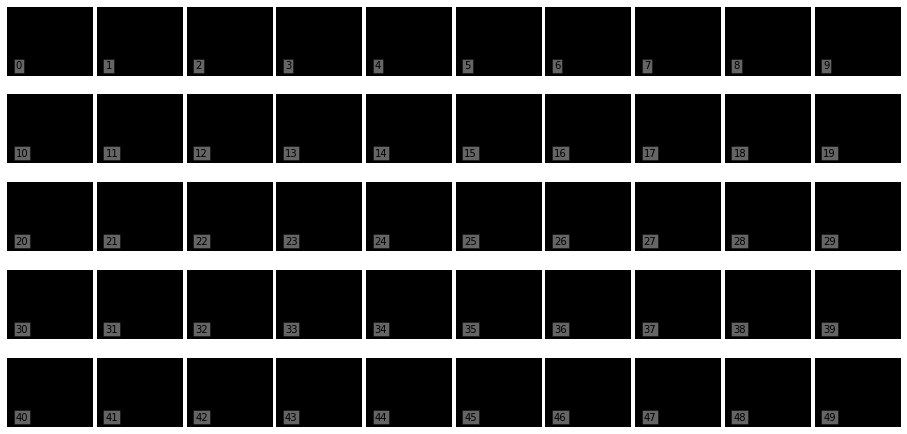

In [9]:
convml_tt.interpretation.plots.grid_overview(tile_dataset, points=50)

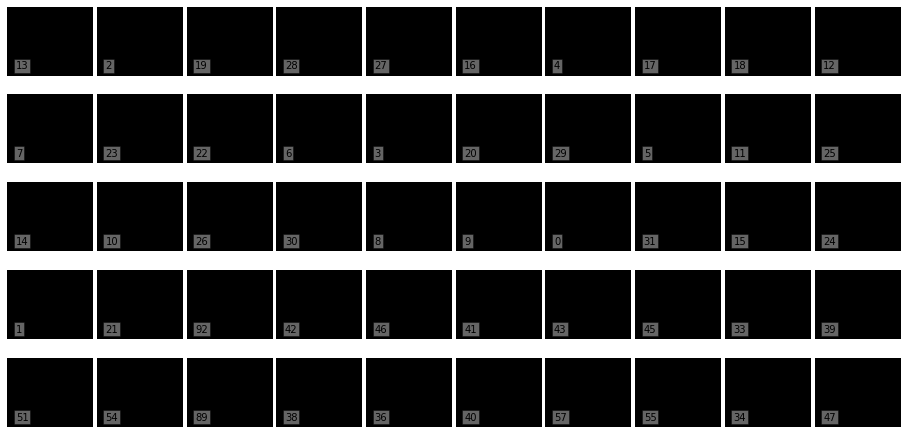

In [10]:
# can be used to for studying a ranking too
def get_dist_to_tile(tile_id, da_):
    dist = np.linalg.norm(da_.sel(tile_id=tile_id) - da_, axis=0)
    return xr.DataArray(dist, coords=dict(tile_id=da_.tile_id), dims=('tile_id',))
    
da_embeddings['dist1'] = get_dist_to_tile(13, da_embeddings)
tile_ids = da_embeddings.sortby('dist1').tile_id.values[:50]

convml_tt.interpretation.plots.grid_overview(tile_dataset, points=tile_ids)